<a href="https://colab.research.google.com/github/ajou-y0uC4N/y0uC4N/blob/main/%EB%B9%85%EC%9D%91%EB%B3%B4_case1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('./drive/MyDrive/Colab Notebooks/team_prj/data/type1.csv')#.to_numpy()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data.loc[data['type']=='Normal', 'type'] = 0
#data.loc[data['type']=='Attack', 'type'] = 1
y = data['type']
X = data.drop(columns =['type'])
X = X.drop(columns =['isCan0'])
X = X.drop(columns = ['time'])


In [ ]:
data.head()


,type,time,isCan0,priority,messageID,isService,serviceNODEID,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
0,Normal,0.000000,1,16,341,0,1,8,0,0,0,0,8,0,0,192,0,6
1,Normal,0.192053,1,16,20000,0,1,2,0,192,-1,-1,-1,-1,-1,-1,0,0
2,Normal,0.192335,1,31,1081,0,1,8,186,84,0,0,0,246,0,128,0,4
3,Normal,0.192504,1,31,1081,0,1,8,0,248,0,0,247,255,223,32,0,3
4,Normal,0.192637,1,31,1081,0,1,4,254,0,0,64,-1,-1,-1,-1,0,0


In [ ]:
data.isnull().sum()
y.unique()

array(['Normal', 'Attack'], dtype=object)

In [ ]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,priority,messageID,isService,serviceNODEID,byteSize,data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],7byteNullCnt,8byteNullCnt
priority,1.000000,0.136174,0.178890,0.743815,-0.170194,-0.000315,0.064244,0.168250,0.375849,0.105707,0.023303,-0.166061,0.004415,-0.179930,-0.002652
messageID,0.136174,1.000000,-0.022028,-0.024616,-0.166788,0.058142,0.061992,-0.012664,-0.017127,-0.014493,-0.014890,-0.040334,-0.043467,-0.029369,-0.035061
isService,0.178890,-0.022028,1.000000,0.211133,0.004687,0.010468,0.005305,0.033778,0.044149,0.024200,0.014774,0.015828,-0.016147,-0.018522,-0.012016
serviceNODEID,0.743815,-0.024616,0.211133,1.000000,-0.142401,-0.044654,0.051154,0.095988,0.216796,0.022822,0.001098,-0.208318,0.007785,-0.176360,0.019602
byteSize,-0.170194,-0.166788,0.004687,-0.142401,1.000000,0.156816,0.129318,0.149001,0.109174,0.234068,0.268550,-0.009111,0.560791,-0.181886,0.391588
data[0],-0.000315,0.058142,0.010468,-0.044654,0.156816,1.000000,0.227329,0.157293,0.050207,0.173635,0.195406,-0.534061,0.713512,-0.812629,0.612012
data[1],0.064244,0.061992,0.005305,0.051154,0.129318,0.227329,1.000000,0.242658,0.600534,0.257227,0.279001,0.158892,0.063255,-0.424379,-0.166679
data[2],0.168250,-0.012664,0.033778,0.095988,0.149001,0.157293,0.242658,1.000000,0.445382,0.693193,0.778228,0.182732,0.347986,-0.326060,-0.253041
data[3],0.375849,-0.017127,0.044149,0.216796,0.109174,0.050207,0.600534,0.445382,1.000000,0.493839,0.508115,0.278966,-0.033589,-0.292921,-0.407017
data[4],0.105707,-0.014493,0.024200,0.022822,0.234068,0.173635,0.257227,0.693193,0.493839,1.000000,0.819374,0.211072,0.372618,-0.322309,-0.254567


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
param_grid = {
    'n_estimators' :[10], #[10, 25 ,50,100],
    'max_depth' : [5],#[5, 10 ,15 ,20],
    'min_samples_split':[15],#[2,5, 7,10,15],
    'min_samples_leaf':[2]#[1,2,4,8,16, 20]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

###grid search random forest
#for train_idx, valid_idx in skfold.split(train_X, train_y):
  #x_train, x_valid = train_X[train_idx], train_X[valid_idx]
  #y_train, y_valid = train_y[train_idx], train_y[valid_idx]
skf = StratifiedKFold(n_splits=5, shuffle=True) # StratifiedKFold
clf = RandomForestClassifier(n_estimators = 10)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=skf)#cv=5)
grid_search.fit(X_train, y_train)

# 가장 성능이 좋은 model 추출
best_rf_model = grid_search.best_estimator_
y_pred1 = best_rf_model.predict(X_test)

# 가장 성능이 좋은 parameter
best_parameters =grid_search.best_params_
best_score = best_rf_model.score(X_test,y_test)

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")
##Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}
##Best score: 0.9949244683921871

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}
Best score: 0.987459508002181


In [ ]:
data2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/team_prj/data/type2.csv')
y2 = data2['type']
X2 = data2.drop(columns =['type'])
X2 = X2.drop(columns =['isCan0'])
X2 = X2.drop(columns = ['time'])

In [ ]:
best_rf_model = grid_search.best_estimator_
best_parameters =grid_search.best_params_

best_score2 = best_rf_model.score(X2,y2)
y_pred2 = best_rf_model.predict(X2)
print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score2}")
##Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}
##Best score: 0.9949244683921871

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}
Best score: 0.9854214802116718


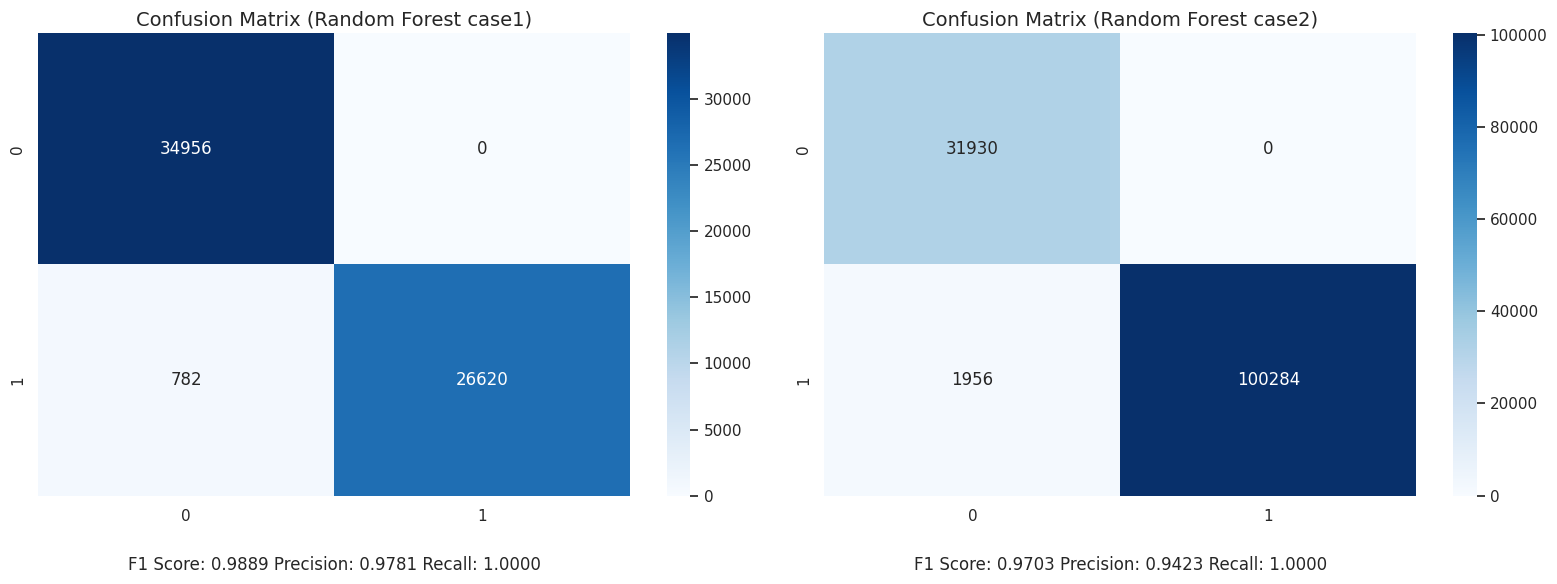

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# case1 model
cm1 = confusion_matrix(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1, pos_label="Attack")
precision_1 = precision_score(y_test, y_pred1, pos_label="Attack")
recall_1 = recall_score(y_test, y_pred1, pos_label="Attack")
#print(f1_1)
# best model
cm2 = confusion_matrix(y2, y_pred2)
f1_2 = f1_score(y2, y_pred2, pos_label="Attack")
precision_2 = precision_score(y2, y_pred2, pos_label="Attack")
recall_2 = recall_score(y2, y_pred2, pos_label="Attack")

# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: baseline model
axes[0].set_title('Confusion Matrix (Random Forest case1)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)



# 두 번째 subplot : Best model
axes[1].set_title('Confusion Matrix (Random Forest case2)', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].text(0.5,-0.15, f'F1 Score: {f1_2:.4f} Precision: {precision_2:.4f} Recall: {recall_2:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes,
             fontsize=12)
#heatmap
sns.heatmap(cm1,annot=True,fmt="d", cmap="Blues", ax=axes[0])
sns.heatmap(cm2,annot=True,fmt="d", cmap="Blues", ax=axes[1])
# subplot 간 간격 조절
plt.tight_layout()
plt.show()

####################################


In [ ]:
##### Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 데이터 분할 (예시)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier 객체 생성
dt_classifier = DecisionTreeClassifier()

# 그리드 탐색을 위한 매개변수 그리드 정의
dt_param_grid = {
    'max_depth': [5],#[3, 5, 10, 15],
    'min_samples_split': [2],#[2, 5, 10],
    'min_samples_leaf': [1]#[1, 2, 4]
}

# StratifiedKFold를 사용하여 교차 검증 수행
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV 객체 생성 및 교차 검증 수행
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 가장 성능이 좋은 모델 추출
best_dt_model = grid_search.best_estimator_

# 가장 성능이 좋은 매개변수 및 점수 출력
best_parameters = grid_search.best_params_
best_score = best_dt_model.score(X_test, y_test)

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")
##Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
##Best score: 0.9875156355239103


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9875156355239103


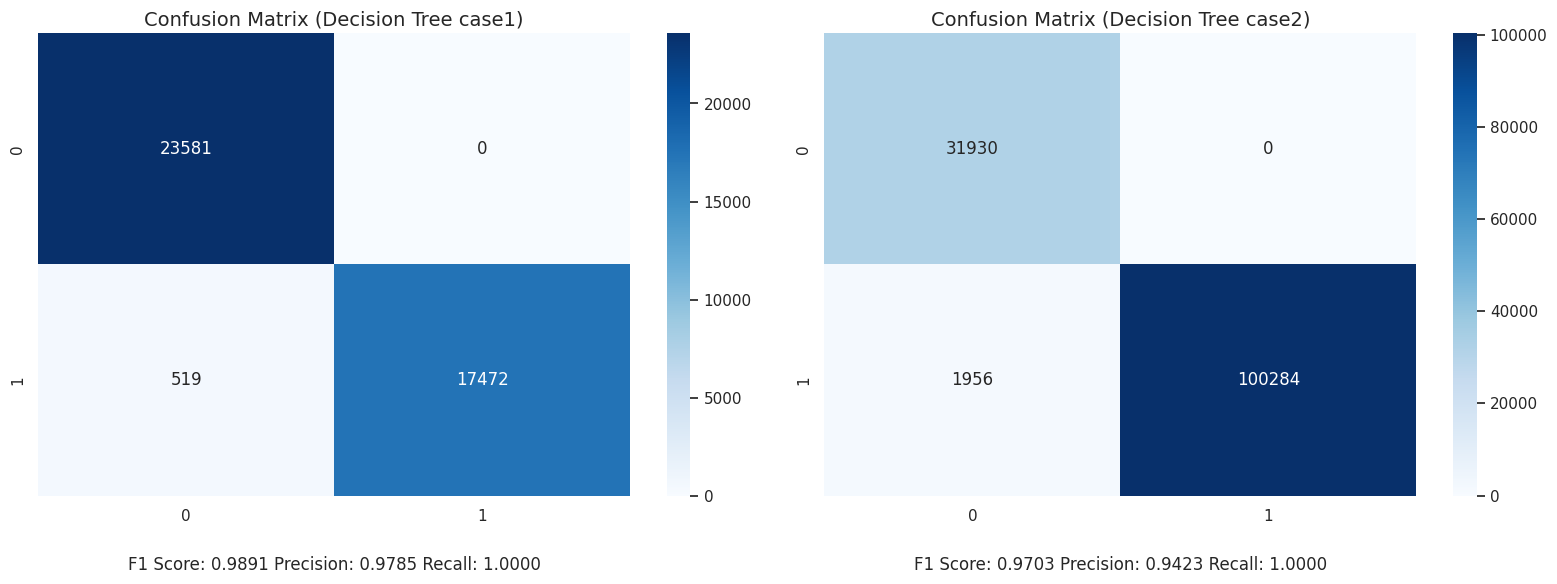

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# case1 model
dt_y_pred1 = best_dt_model.predict(X_test)

cm1 = confusion_matrix(y_test, dt_y_pred1)
f1_1 = f1_score(y_test, dt_y_pred1, pos_label="Attack")
precision_1 = precision_score(y_test, dt_y_pred1, pos_label="Attack")
recall_1 = recall_score(y_test, dt_y_pred1, pos_label="Attack")
#print(f1_1)
# case2 model
dt_y_pred2 = best_dt_model.predict(X2)
cm2 = confusion_matrix(y2, dt_y_pred2)
f1_2 = f1_score(y2, dt_y_pred2, pos_label="Attack")
precision_2 = precision_score(y2, dt_y_pred2, pos_label="Attack")
recall_2 = recall_score(y2, dt_y_pred2, pos_label="Attack")

# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: baseline model
axes[0].set_title('Confusion Matrix (Decision Tree case1)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)



# 두 번째 subplot : Best model
axes[1].set_title('Confusion Matrix (Decision Tree case2)', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].text(0.5,-0.15, f'F1 Score: {f1_2:.4f} Precision: {precision_2:.4f} Recall: {recall_2:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes,
             fontsize=12)
#heatmap
sns.heatmap(cm1,annot=True,fmt="d", cmap="Blues", ax=axes[0])
sns.heatmap(cm2,annot=True,fmt="d", cmap="Blues", ax=axes[1])
# subplot 간 간격 조절
plt.tight_layout()
plt.show()

####################################


In [ ]:
from sklearn.svm import LinearSVC

rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=100, C=100)
kernel_svm_param_grid = {
    'gamma':  [0.001, 0.01, 0.1 , 1 , 10, 100],
    'C': [0.001, 0.01, 0.1 , 1 , 10, 100]
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rbf_kernel_svm_clf, param_grid=kernel_svm_param_grid, cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_

best_parameters = grid_search.best_params_
best_score = best_dt_model.score(X_test, y_test)

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")